# SECTION 4.5: SUCCESS SCATTER PLOT

In [1]:
# TEST DELTA DEPENDENCIES WITHOUT MERGER CRITERION AND ONLY ABOVE 2 GYR
import os
import sys
import glob
from scipy import stats
sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/Model')
import cuspcore_go
reload(cuspcore_go)
from cuspcore_aux import *
import pickle
import numpy
import scipy
from scipy.special import erf

Ttype='Tmulti'#'jeans-Mreal'
rmin_evolve=0.02
rmax_evolve=1.
linear_slopes=False
t_min=3.
merger_thr=1.
Dsnapshot_threshold=0.1

sims=[sim[52:60] for sim in glob.glob('/cs/sci/freundlich/CUSPCORE/ARTICLE/output_20190503_g[!s]*[!temp].pickle')]
print sims
print 'size sims=',size(sims)

t1_array_all=[]
t2_array_all=[]
Dsnapshot_all=[]
delta_all=[]
delta_i_all=[]
fmean_all=[]
fstd_all=[]
fmerger_all=[]
fprofile_all=[]
fprofile_simname=[]

for sim in sims:
    #print "sim=", sim
    output_file_sim='/cs/sci/freundlich/CUSPCORE/ARTICLE/output_20190503_%s.pickle'%sim
    with open(output_file_sim) as f:
        output_sim = pickle.load(f)
    
    [percent_tot,t1_array,t2_array,Dsnapshot,delta,delta_i,fmean,fstd,fmerger,fprofile, fprofile_simname,criteria_threshold]=output_sim
    t1_array_all.append(t1_array[0])
    t2_array_all.append(t2_array[0])
    Dsnapshot_all.append(Dsnapshot[0])
    delta_all.append(delta[0])
    delta_i_all.append(delta_i[0])
    fmean_all.append(fmean[0])
    fstd_all.append(fstd[0])
    fmerger_all.append(fmerger[0])
    fprofile_all.append(fprofile)
    
output=[percent_tot,t1_array_all,t2_array_all,Dsnapshot_all,delta_all,delta_i_all,fmean_all,fstd_all,fmerger_all,fprofile_all, fprofile_simname,criteria_threshold]
count_output=count_successes_all(sims,output,merger_threshold=0.1,fit_threshold=0.07,t_min=t_min)
count_output=count_successes_all(sims,output,merger_threshold=0.1,fit_threshold=0.07,t_min=t_min,print_line=False,table_line=True)

print 'Load: Done!'


########################################################

[percent_tot,t1_array_all,t2_array_all,Dsnapshot_all,delta_all,delta_i_all,fmean_all,fstd_all,fmerger_all,fprofile_all, fprofile_simname,criteria_threshold] =output
ngalaxies = shape(t1_array_all)[0]

########################################################

##### LOAD PROPERTY NAMES
catalog='/cs/sci/freundlich/CUSPCORE/catalogs/NIHAO_a%.4f.txt'%1.
colnames=genfromtxt(catalog,max_rows=1,dtype='S20')

##### LOAD TIMES
import pickle
directory='/cs/sci/freundlich/CUSPCORE/NIHAO_data/'
with open(directory+'NIHAO-%s.pickle'%sims[10][1:]) as f:
            gl = pickle.load(f)

a_array=[]
for (i,ss) in zip(range(size(gl)),gl):
            a_array.append(ss['a'])         
        
a_array=array(a_array)
z_array = 1./a_array - 1.
logz=log10(z_array)

time=array(t2_array_all).flatten().copy()

n_outputs=size(a_array)
sim_list=[]
i_array=[]
for i in range(size(sims)):
    sim_list=sim_list+[sims[i]]*n_outputs
    i_array=i_array+[i for i in range(n_outputs)]

sim_list=array(sim_list)
i_array=array(i_array)

#### GET DELTA AND SUCCESS 
delta=array(delta_all).flatten().copy()
delta_red=delta.copy()
delta_red[time<t_min]=nan*ones_like(delta_red[time<t_min])
dsim=abs(array(Dsnapshot_all).flatten().copy())
dsim_red=dsim.copy()
deltai=abs(array(delta_i_all).flatten().copy())

#### MASS RATIOS
frms=array(fmean_all).flatten().copy()
fmerger=abs(array(fmerger_all).flatten()).copy()
previous_fmerger=array([nan]+fmerger[:-1].tolist()).copy()

#fmax=0.35
frms_red=frms.copy()
fmerger_red=fmerger.copy()
previous_fmerger_red=previous_fmerger.copy()

frms_red[log10(frms_red)==-inf]=nan
fmerger_red[log10(fmerger_red)==-inf]=nan

#### QUANTITIES FROM FANGZHOU JIANG'S CATALOG

mvir=[]
rvir=[]
mstar=[]
mgas=[]
mcold=[]
SFR=[]
re_star=[]
n_sersic=[]
cnfw=[]
q=[]
p=[]

for ID in sims:
    for a in a_array:
        if a==a_array[0] or a ==a_array[1]:
            mvir.append(nan)
            rvir.append(nan)
            mstar.append(nan)
            mgas.append(nan)
            mcold.append(nan)
            SFR.append(nan)
            re_star.append(nan)
            n_sersic.append(nan)
            cnfw.append(nan)
            p.append(nan)
            q.append(nan)
        else:
            catalog='/cs/sci/freundlich/CUSPCORE/catalogs/NIHAO_a%.4f.txt'%a
            data=genfromtxt(catalog,skip_header =1)
            try:
                ok_fangzhou,r12_fangzhou,rvir_fangzhou,mvir_fangzhou,mstar_fangzhou=get_fangzhou_radii(ID,[a],get_stars=True)
                i_ID=where(data[:,0]==float(ID[1:]))[0][0]
                mvir.append(mvir_fangzhou[0])
                rvir.append(rvir_fangzhou[0])
                mstar.append(data[i_ID,17])
                mgas.append(data[i_ID,18])
                mcold.append(data[i_ID,19])
                SFR.append(data[i_ID,20])
                re_star.append(data[i_ID,21])
                n_sersic.append(data[i_ID,32])
                cnfw.append(data[i_ID,12])
                q.append(data[i_ID,33])
                p.append(data[i_ID,34])    
            except:
                mvir.append(nan)
                rvir.append(nan)
                mstar.append(nan)
                mgas.append(nan)
                mcold.append(nan)
                SFR.append(nan)
                re_star.append(nan)
                n_sersic.append(nan)
                cnfw.append(nan)
                q.append(nan)
                p.append(nan)

mvir=array(mvir)
rvir=array(rvir)
mstar=array(mstar)
mgas=array(mgas)
mcold=array(mcold)
SFR=array(SFR)
re_star=array(re_star)
n_sersic=array(n_sersic)
cnfw=array(cnfw)
q=array(q)
p=array(p)


f=sqrt(1-p**2)
e=sqrt(1-q**2)
ef=e-f
epf=e+f

mugas=mgas/mstar
muhot=(mgas-mcold)/mstar
mucold=mcold/mstar

mugas_red=mugas.copy()
mugas_red[mugas_red>50]=nan*ones_like(mugas_red[mugas_red>50])
mucold_red=mucold.copy()
mucold_red[mucold_red>50]=nan*ones_like(mucold_red[mucold_red>50])

fgas=mgas/(mstar+mgas+mvir)
fcold=mcold/(mstar+mgas)
fhot=(mgas-mcold)/(mstar+mgas)
fb=(mgas+mstar)/(mgas+mstar+mvir)
fb_gas=mgas/(mgas+mstar+mvir)
fb_star=mstar/(mgas+mstar+mvir)

mugas_dm=mgas/mvir
print 'Definitions: Done!'

/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


['g1.57e11', 'g4.99e10', 'g3.21e11', 'g3.44e10', 'g3.59e11', 'g6.12e10', 'g2.04e11', 'g4.27e10', 'g4.94e10', 'g5.05e10', 'g2.19e11', 'g6.37e10', 'g3.49e11', 'g1.08e11', 'g1.64e11', 'g2.54e11', 'g4.48e10', 'g9.59e10', 'g2.94e10', 'g4.90e11', 'g5.46e11', 'g4.86e10', 'g6.91e10', 'g6.96e10', 'g2.41e11', 'g6.77e10', 'g8.89e10', 'g3.55e11', 'g1.37e11', 'g1.59e11', 'g3.23e11', 'g1.52e11', 'g1.05e11']
size sims= 33
g1.57e11: 23/50 = 46 percent success
        : 16/30 = 53 percent success without mergers
        : 12/23 = 52 percent success when fmean > 0.06
        : 4/7 = 57 percent success when fmean < 0.06
g4.99e10: 30/50 = 60 percent success
        : 30/41 = 73 percent success without mergers
        : 14/23 = 61 percent success when fmean > 0.06
        : 16/18 = 89 percent success when fmean < 0.06
g3.21e11: 24/50 = 48 percent success
        : 22/33 = 67 percent success without mergers
        : 17/26 = 65 percent success when fmean > 0.06
        : 5/7 = 71 percent success when fmean 

Definitions: Done!


In [2]:
# GET THE PROFILE PARAMETERS

rmin_fit=0.01

sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/General')
sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/Preparing')
sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/Model')
sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/Formatting')

import treal_functions
import general_functions
import slopes_functions
import prepare_functions
import fitting as fit
import cuspcore_aux
import cuspcore_plots
import evolving

reload(treal_functions)
reload(general_functions)
reload(slopes_functions)
reload(prepare_functions)
reload(fit)
reload(cuspcore_aux)
reload(cuspcore_plots)
reload(evolving)

from general_functions import *
from slopes_functions import *
from prepare_functions import *
from cuspcore_aux import *
from cuspcore_plots import *
from evolving import *


pi_all=[]
pf_all=[]
pmodel_all=[]

sin_i_all=[]
sin_f_all=[]
sin_model_all=[]

cmax_i_all=[]
cmax_f_all=[]
cmax_model_all=[]

Dsin_if_all=[]
Dsin_model_all=[]
Rsin_if_all=[]
Rsin_model_all=[]

Dcmax_if_all=[]
Dcmax_model_all=[]
Rcmax_if_all=[]
Rcmax_model_all=[]

for sim in sims:
    try:
        #print "sim=", sim
        output_file_sim='/cs/sci/freundlich/CUSPCORE/ARTICLE/poutput_20190503_%s.pickle'%sim
        with open(output_file_sim) as f:
            output_sim = pickle.load(f)

        [_, _, _, _, _, _, _, p_i, p_f, p_model]=output_sim
        pi_all.append(p_i[0])
        pf_all.append(p_f[0])
        pmodel_all.append(p_model[0])
        
        sin_i=[]
        sin_f=[]
        sin_model=[]
        for ioutput in range(shape(p_i[0])[0]):
            try:    sin_i.append(prf.s(rmin_fit*p_i[0][ioutput][4],p_i[0][ioutput]))
            except: sin_i.append(nan)
            try:    sin_f.append(prf.s(rmin_fit*p_f[0][ioutput][4],p_f[0][ioutput]))
            except: sin_f.append(nan)
            try:    sin_model.append(prf.s(rmin_fit*p_model[0][ioutput][4],p_model[0][ioutput]))
            except: sin_model.append(nan) 

        sin_i=array(sin_i)
        sin_f=array(sin_f)
        sin_model=array(sin_model)
        Dsin_if=sin_f-sin_i
        Dsin_model=sin_model-sin_i
        Rsin_if=sin_f/sin_i
        Rsin_model=sin_model/sin_i
        
        sin_i_all.append(sin_i)
        sin_f_all.append(sin_f)
        sin_model_all.append(sin_model)
        Dsin_if_all.append(Dsin_if)
        Dsin_model_all.append(Dsin_model)
        Rsin_if_all.append(Rsin_if)
        Rsin_model_all.append(Rsin_model)
        
        cmax_i=[]
        cmax_f=[]
        cmax_model=[]
        for ioutput in range(shape(p_i[0])[0]):
            try:    cmax_i.append(prf.cmax(p_i[0][ioutput]))
            except: cmax_i.append(nan)
            try:    cmax_f.append(prf.cmax(p_f[0][ioutput]))
            except: cmax_f.append(nan)
            try:    cmax_model.append(prf.cmax(p_model[0][ioutput]))
            except: cmax_model.append(nan) 

        cmax_i=array(cmax_i)
        cmax_f=array(cmax_f)
        cmax_model=array(cmax_model)
        Dcmax_if=cmax_f-cmax_i
        Dcmax_model=cmax_model-cmax_i
        Rcmax_if=cmax_f/cmax_i
        Rcmax_model=cmax_model/cmax_i
        
        cmax_i_all.append(cmax_i)
        cmax_f_all.append(cmax_f)
        cmax_model_all.append(cmax_model)
        Dcmax_if_all.append(Dcmax_if)
        Dcmax_model_all.append(Dcmax_model)
        Rcmax_if_all.append(Rcmax_if)
        Rcmax_model_all.append(Rcmax_model)

    except:
        print 'No poutput for %s'%sim

Dsin_if=array(Dsin_if_all).copy().flatten()
Dsin_model=array(Dsin_model_all).copy().flatten()
Rsin_if=array(Rsin_if_all).copy().flatten()
Rsin_model=array(Rsin_model_all).copy().flatten()

Dcmax_if=array(Dcmax_if_all).copy().flatten()
Dcmax_model=array(Dcmax_model_all).copy().flatten()
Rcmax_if=array(Rcmax_if_all).copy().flatten()
Rcmax_model=array(Rcmax_model_all).copy().flatten()

# DEFINE IS_SUCCESS_ALL AND IS_MERGER_ALL
is_merger_all=[]
is_success_all=[]
for i in range(size(sims)):
    for ioutput in range(n_outputs):
        if ioutput==0:
            is_merger_all.append(False)
            is_success_all.append(False)
        else:
            is_merger=(fmerger[i*n_outputs:(i+1)*n_outputs][ioutput]>0.1)
            is_success=((delta[i*n_outputs:(i+1)*n_outputs][ioutput]<=Dsnapshot_threshold) and ((delta[i*n_outputs:(i+1)*n_outputs][ioutput]<=deltai[i*n_outputs:(i+1)*n_outputs][ioutput]) or (dsim[i*n_outputs:(i+1)*n_outputs][ioutput]<=0.03)))
            is_merger_all.append(is_merger)
            is_success_all.append(is_success)

is_merger_all=array(is_merger_all)
is_success_all=array(is_success_all)
print 'Done!'



Done!


In [23]:
ID='g1.08e11'
ok_fangzhou,r12_fangzhou,rvir_fangzhou,mvir_fangzhou,mstar_fangzhou=get_fangzhou_radii(ID,a_array,get_stars=True)
output_file_sim='/cs/sci/freundlich/CUSPCORE/ARTICLE/poutput_20190503_%s.pickle'%ID
with open(output_file_sim) as f:
    output_sim = pickle.load(f)

[_, _, _, _, _, _, _, p_i, p_f, p_model]=output_sim

for i in range(n_outputs):
    print i, rvir_fangzhou[i], p_f[0][i][4]
    

0 nan nan
1 nan nan
2 4.94549 nan
3 7.34938 nan
4 11.0532 nan
5 16.2224 nan
6 21.9448 nan
7 25.2093 nan
8 27.2742 nan
9 29.2293 nan
10 32.1223 nan
11 34.6103 nan
12 37.512 nan
13 39.7055 nan
14 41.899 41.899
15 44.2391 44.2391
16 46.2372 46.2372
17 48.5112 48.5112
18 50.7872 50.7872
19 53.9721 53.9721
20 58.778 58.778
21 61.7247 61.7247
22 64.7127 64.7127
23 67.155 67.155
24 69.4851 69.4851
25 71.6537 71.6537
26 73.5315 73.5315
27 75.2456 75.2456
28 76.8408 76.8408
29 78.7647 78.7647
30 80.4488 80.4488
31 82.2179 82.2179
32 84.6534 84.6534
33 86.6649 86.6649
34 88.5895 88.5895
35 90.366 90.366
36 92.078 92.078
37 93.8417 93.8417
38 95.6746 95.6746
39 97.443 97.443
40 99.1152 99.1152
41 100.739 100.739
42 102.609 102.609
43 104.413 104.413
44 106.131 106.131
45 107.942 107.942
46 110.071 110.071
47 111.997 111.997
48 113.609 113.609
49 115.353 115.353
50 117.031 117.031
51 118.599 118.599
52 120.113 120.113
53 121.565 121.565
54 123.138 123.138
55 124.662 124.662
56 126.356 126.356
57 1

In [3]:
def plot_correlation(x,y,is_merger,x_label=r'$s_{\rm in,f}-s_{\rm in,i}$',y_label=r'$s_{\rm in,model}-s_{\rm in,i}$',directory='/vol/sci/astro/home/freundlich/CUSPCORE/ARTICLE/figures3/',filename='fig_Dsin_model_scatter',n_levels=30,axlim=[-0.75,0.75,-0.75,0.75],x_ticks=[-0.75,-0.5,-0.25,0,0.25,0.5,0.75],x_labels=[r'$-0.75$',r'$-0.50$',r'$-0.25$',r'$0$',r'$0.25$',r'$0.50$',r'$0.75$'],y_ticks=[-0.75,-0.5,-0.25,0,0.25,0.5,0.75],y_labels=[r'$-0.75$',r'$-0.50$',r'$-0.25$',r'$0$',r'$0.25$',r'$0.50$',r'$0.75$'],rasterized= False):
    space_down=0.18
    space_left=0.07
    width=0.21
    height=width*18./6.*3.5/3.
    figsize=(7,5)
    fontsize=16
    markersize=50

    x=array_nonan(x,y)
    is_merger=array_nonan(is_merger,y)
    y=array_nonan(y,y)
    y=array_nonan(y,x)
    is_merger=array_nonan(is_merger,x)
    x=array_nonan(x,x)

    import seaborn as sns
    import scipy.odr as odr
    from scipy import optimize

    def f(x,p0,p1):
        return p0 + p1*x
    popt, pcov = optimize.curve_fit(f, x, y)
    perr = np.sqrt(np.diag(pcov))

    popt_merger, pcov_merger = optimize.curve_fit(f, x[where(is_merger==1)], y[where(is_merger==1)])
    perr_merger = np.sqrt(np.diag(pcov_merger))

    popt_nomerger, pcov_nomerger = optimize.curve_fit(f, x[where(is_merger==0)], y[where(is_merger==0)])
    perr_nomerger = np.sqrt(np.diag(pcov_nomerger))

    if axlim<>[]:
        xmin=axlim[0]
        xmax=axlim[1]
    else:
        xmin=x.min()
        xmax=x.max()

    # DETERMINE THE SCATTER
    rpearson_all=scipy.stats.pearsonr(x[where((x>xmin)&(x<xmax))],y[where((x>xmin)&(x<xmax))])[0]
    sigma_scatter_all=std(y[where((x>xmin)&(x<xmax))]-x[where((x>xmin)&(x<xmax))])

    rpearson_mergers=scipy.stats.pearsonr(x[where((x>xmin)&(x<xmax)&(is_merger==1))],y[where((x>xmin)&(x<xmax)&(is_merger==1))])[0]
    sigma_scatter_mergers=std(y[where((x>xmin)&(x<xmax)&(is_merger==1))]-x[where((x>xmin)&(x<xmax)&(is_merger==1))])

    rpearson_nonmergers=scipy.stats.pearsonr(x[where((x>xmin)&(x<xmax)&(is_merger==0))],y[where((x>xmin)&(x<xmax)&(is_merger==0))])[0]
    sigma_scatter_nonmergers=std(y[where((x>xmin)&(x<xmax)&(is_merger==0))]-x[where((x>xmin)&(x<xmax)&(is_merger==0))])
    
    print 'rpearson = %.2f (all), %.2f (mergers), %.2f (non-mergers)'%(rpearson_all,rpearson_mergers,rpearson_nonmergers)
    print 'sigma    = %.2f (all), %.2f (mergers), %.2f (non-mergers)'%(sigma_scatter_all,sigma_scatter_mergers,sigma_scatter_nonmergers)
    
    
    ####################################################
    fig, ax = subplots(nrows=1, ncols=1,figsize=figsize)
    clf()

    ax=gca()
    ax.axvline(0.,color='gray')
    ax.axhline(0.,color='gray')

    ax.scatter(x[where(is_merger==0)],y[where(is_merger==0)],marker='.',s=10,c='b',edgecolor='face',alpha=0.7,rasterized= rasterized)
    ax.scatter(x[where(is_merger==1)],y[where(is_merger==1)],marker='o',s=10,c='r',facecolors='none', edgecolors='r',alpha=1,rasterized= rasterized)
    
    abscisse=linspace(xmin,xmax,1000)
    
    ax.plot(abscisse,abscisse,'k')
    ax.plot(abscisse,abscisse+sigma_scatter_all,'k--')
    ax.plot(abscisse,abscisse-sigma_scatter_all,'k--')

    ax.set_position([space_left+0.13,space_down, height*5./7., height])
    ax.tick_params(axis='both',direction='in')

    xlabel(x_label)
    ylabel(y_label)

    if axlim<>[]:
        axis(axlim)
    if x_ticks<>[]:
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_labels,fontsize=fontsize)
    if y_ticks<>[]:
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_labels,fontsize=fontsize)

    savefig(directory+'/'+filename+'.pdf')#, bbox_inches='tight')



In [4]:
Dsin=array(sin_model_all).copy().flatten()-array(sin_f_all).copy().flatten()
Rcmax=log10(array(cmax_model_all).copy().flatten()/array(cmax_f_all).copy().flatten())

rpearson = 0.55 (all), 0.48 (mergers), 0.61 (non-mergers)
sigma    = 0.15 (all), 0.29 (mergers), 0.12 (non-mergers)


/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


"\nx=log10(Rsin_if.copy())\ny=log10(Rsin_model.copy())\nis_merger=is_merger_all.copy()\n\nx_label=r'$\\log(s_{\rm in,f}/s_{\rm in,i})$'\ny_label=r'$\\log(s_{\rm in,model}/s_{\rm in,i})$'\ndirectory='/vol/sci/astro/home/freundlich/CUSPCORE/ARTICLE/figures3/'\nfilename='fig_Rsin_model_scatter'\n\nplot_correlation(x,y,is_merger,directory=directory,filename=filename,x_label=x_label,y_label=y_label,axlim=axlim,x_ticks=x_ticks,y_ticks=y_ticks,y_labels=y_labels)\n"

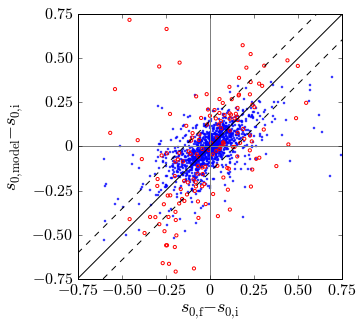

In [5]:
# sin

axlim=[-0.75,0.75,-0.75,0.75]
x_ticks=[-0.75,-0.5,-0.25,0,0.25,0.5,0.75]
x_labels=[r'$-0.75$',r'$-0.50$',r'$-0.25$',r'$0$',r'$0.25$',r'$0.50$',r'$0.75$']
y_ticks=[-0.75,-0.5,-0.25,0,0.25,0.5,0.75]
y_labels=[r'$-0.75$',r'$-0.50$',r'$-0.25$',r'$0$',r'$0.25$',r'$0.50$',r'$0.75$']

# Dsin
x=Dsin_if.copy()#log10(Rsin_if.copy())
y=Dsin_model.copy()#log10(Rsin_model.copy())
is_merger=is_merger_all.copy()

x_label=r'$s_{\rm 0,f}-s_{\rm 0,i}$'
y_label=r'$s_{\rm 0,model}-s_{\rm 0,i}$'
directory='/vol/sci/astro/home/freundlich/CUSPCORE/ARTICLE/figures3/'
filename='fig_Dsin_model_scatter'

plot_correlation(x,y,is_merger,directory=directory,filename=filename,x_label=x_label,y_label=y_label,rasterized= True)


rpearson = 0.72 (all), 0.83 (mergers), 0.63 (non-mergers)
sigma    = 0.11 (all), 0.17 (mergers), 0.10 (non-mergers)


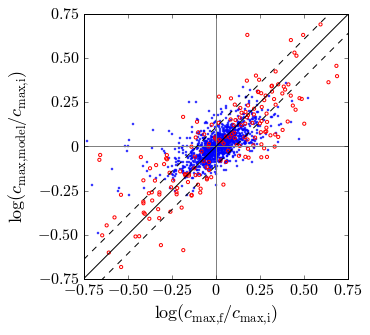

In [6]:
# Rcmax
x=log10(Rcmax_if.copy())
y=log10(Rcmax_model.copy())
is_merger=is_merger_all.copy()

x_label=r'$\log(c_{\rm max,f}/c_{\rm max,i})$'
y_label=r'$\log(c_{\rm max,model}/c_{\rm max,i})$'
directory='/vol/sci/astro/home/freundlich/CUSPCORE/ARTICLE/figures3/'
filename='fig_Rcmax_model_scatter'
axlim=[-0.75,0.75,-0.75,0.75]
x_ticks=[-0.75,-0.5,-0.25,0,0.25,0.5,0.75]
x_labels=[r'$-0.75$',r'$-0.50$',r'$-0.25$',r'$0$',r'$0.25$',r'$0.50$',r'$0.75$']
y_ticks=[-0.75,-0.5,-0.25,0,0.25,0.5,0.75]
y_labels=[r'$-0.75$',r'$-0.50$',r'$-0.25$',r'$0$',r'$0.25$',r'$0.50$',r'$0.75$']

plot_correlation(x,y,is_merger,directory=directory,filename=filename,x_label=x_label,y_label=y_label,axlim=axlim,x_ticks=x_ticks,y_ticks=y_ticks,y_labels=y_labels,rasterized= True)
